In [1]:
import pandas as pd
from scipy import stats
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans

def split_labels(df, cols):
    '''split the dataframe into predicting table and labels
       df: given dataset
       cols: list of labels
    '''
    return df[[i for i in df if i not in cols]], df[cols]

def SE(X, n=2, nn=30):
    se = SpectralEmbedding(n_components=n, affinity='nearest_neighbors', n_neighbors=nn, eigen_solver='arpack')
    X_CE = se.fit_transform(X)
    return X_CE

In [2]:
def analysis(X,Y, i, n, nn):
    Xd = SE(X,i, nn)
    kmeans = KMeans(n_clusters=n, random_state=0, n_init=30).fit(Xd)
    Yr = kmeans.labels_
    from scipy.stats import spearmanr, pearsonr

    spr, _ = spearmanr(Yr, Y)
    prs, _ = pearsonr(Yr, Y)

    ari = metrics.adjusted_rand_score(Y, Yr)
    nmi = metrics.normalized_mutual_info_score(Y, Yr)
    return spr, prs, ari, nmi



(2126, 34)
    Number of reduced dimension   Pearson  Spearman
0                             2  0.624129  0.414516
1                             4  0.624129  0.414516
2                             6 -0.342361 -0.405587
3                             8 -0.419483 -0.321343
4                            10  0.375044  0.571953
5                            12 -0.107541 -0.085435
6                            14  0.420084  0.321441
7                            16 -0.297980 -0.266726
8                            18  0.256450  0.048435
9                            20 -0.253469 -0.223856
10                           22  0.208344  0.125388
11                           24  0.495843  0.405064
12                           26  0.349505  0.299168
13                           28  0.332231  0.388112
14                           30 -0.142311 -0.190382


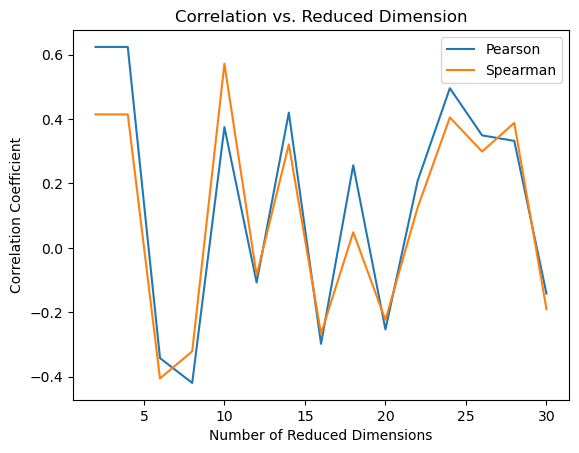

In [3]:
df2 = pd.read_excel('CTG.xls', sheet_name = 'Raw Data')

df2 = df2[[i for i in df2 if i not in ["FileName","Date","SegFile","b","e","CLASS"]]]
print(df2.shape)

df1 = df2.dropna()

X, Y = split_labels(df1, ['NSP'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

results = {}
for i in range(2, X.shape[1]-1, 2):
    results[i] = analysis(X,Y['NSP'], i, 3, 60)


fdf = pd.DataFrame({'Number of reduced dimension': [i for i in results],
                    'Pearson': [results[i][0] for i in results] , 
                    'Spearman': [results[i][1] for i in results]})
# -------------------------------------------------------------------
print(fdf)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plot lines
ax.plot(fdf['Number of reduced dimension'], fdf['Pearson'], label='Pearson')
ax.plot(fdf['Number of reduced dimension'], fdf['Spearman'], label='Spearman')

# add title and axis labels
ax.set_title('Correlation vs. Reduced Dimension')
ax.set_xlabel('Number of Reduced Dimensions')
ax.set_ylabel('Correlation Coefficient')

# add legend
ax.legend()

# show plot
plt.show()

    Number of reduced dimension   Pearson  Spearman
0                             2  0.274087  0.274087
1                             4  0.274087  0.274087
2                             6 -0.186820 -0.186820
3                             8 -0.186820 -0.186820
4                            10 -0.186820 -0.186820
5                            12 -0.186820 -0.186820
6                            14 -0.111713 -0.111713
7                            16  0.085639  0.085639
8                            18  0.085639  0.085639
9                            20  0.085639  0.085639
10                           22 -0.116337 -0.116337
11                           24 -0.205720 -0.205720
12                           26  0.166580  0.166580
13                           28  0.076357  0.076357


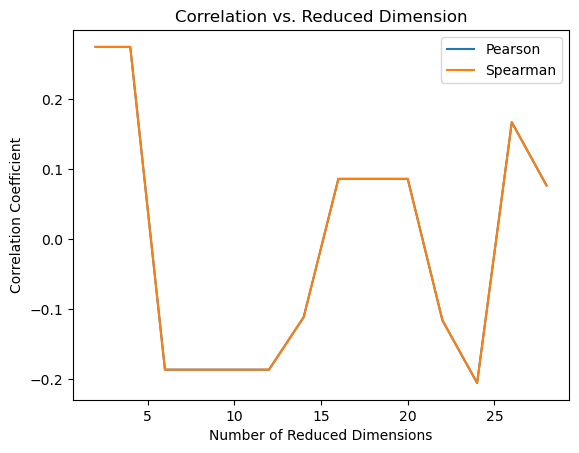

In [4]:
df1 = pd.read_csv('heart.csv')

# Preprocessing
dataset = df1
from pandas import get_dummies
a = pd.get_dummies(dataset['sex'], prefix = "sex")
b = pd.get_dummies(dataset['cp'], prefix = "cp")
c = pd.get_dummies(dataset['fbs'], prefix = "fbs")
d = pd.get_dummies(dataset['restecg'], prefix = "restecg")
e = pd.get_dummies(dataset['exang'], prefix = "exang")
f = pd.get_dummies(dataset['slope'], prefix = "slope")
g = pd.get_dummies(dataset['ca'], prefix = "ca")
h = pd.get_dummies(dataset['thal'], prefix = "thal")

frames = [dataset, a, b, c, d, e, f, g, h]
dataset2 = pd.concat(frames, axis = 1)
dataset2 = dataset2.drop(columns = ['sex','cp', 'fbs', 'restecg','exang','slope','ca','thal'])

df1 = dataset2
X, Y = split_labels(df1, ['target'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

results = {}
for i in range(2, X.shape[1]-1, 2):
    results[i] = analysis(X,Y['target'], i, 2, 30)

fdf = pd.DataFrame({'Number of reduced dimension': [i for i in results],
                    'Pearson': [results[i][0] for i in results] , 
                    'Spearman': [results[i][1] for i in results]})
# -------------------------------------------------------------------
print(fdf)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plot lines
ax.plot(fdf['Number of reduced dimension'], fdf['Pearson'], label='Pearson')
ax.plot(fdf['Number of reduced dimension'], fdf['Spearman'], label='Spearman')

# add title and axis labels
ax.set_title('Correlation vs. Reduced Dimension')
ax.set_xlabel('Number of Reduced Dimensions')
ax.set_ylabel('Correlation Coefficient')

# add legend
ax.legend()

# show plot
plt.show()

# External evaluation metrics. 

These metrics evaluate the clustering results based on a comparison with the ground truth labels that are assumed to be known.

Two commonly used external evaluation metrics are:

Adjusted Rand Index (ARI): This metric measures the similarity between the clustering results and the true labels. It returns a value between -1 and 1, where 1 indicates perfect clustering and 0 indicates random clustering.

Normalized Mutual Information (NMI): This metric measures the amount of mutual information between the clustering results and the true labels, normalized by the entropy of the two label distributions. It also returns a value between 0 and 1, where 1 indicates perfect clustering and 0 indicates random clustering.

    Number of reduced dimension   Pearson  Spearman
0                             2  0.274087  0.274087
1                             4  0.274087  0.274087
2                             6 -0.186820 -0.186820
3                             8 -0.186820 -0.186820
4                            10 -0.186820 -0.186820
5                            12 -0.186820 -0.186820
6                            14 -0.111713 -0.111713
7                            16  0.085639  0.085639
8                            18  0.085639  0.085639
9                            20  0.085639  0.085639
10                           22 -0.116337 -0.116337
11                           24 -0.205720 -0.205720
12                           26  0.166580  0.166580
13                           28  0.076357  0.076357


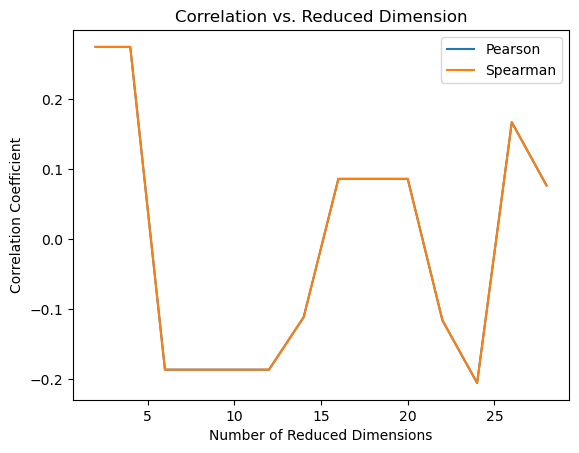

In [5]:
fdf = pd.DataFrame({'Number of reduced dimension': [i for i in results],
                    'Pearson': [results[i][0] for i in results] , 
                    'Spearman': [results[i][1] for i in results]})
# -------------------------------------------------------------------
print(fdf)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plot lines
ax.plot(fdf['Number of reduced dimension'], fdf['Pearson'], label='Pearson')
ax.plot(fdf['Number of reduced dimension'], fdf['Spearman'], label='Spearman')

# add title and axis labels
ax.set_title('Correlation vs. Reduced Dimension')
ax.set_xlabel('Number of Reduced Dimensions')
ax.set_ylabel('Correlation Coefficient')

# add legend
ax.legend()

# show plot
plt.show()






